In [2]:
import pandas as pd

In [3]:
pd.read_csv('cleaned_wine_data.csv')

,frquency,impedance,wine_id,wine_name,Unnamed: 10,类别,类别编码
0,20,2016,1,江小白果立方,NaN,白酒,2
1,21,2012,1,江小白果立方,NaN,白酒,2
2,22,2005,1,江小白果立方,NaN,白酒,2
3,23,2011,1,江小白果立方,NaN,白酒,2
4,24,2023,1,江小白果立方,NaN,白酒,2
...,...,...,...,...,...,...,...
29066,92,1493,39,强爽,NaN,鸡尾酒,3
29067,93,1492,39,强爽,NaN,鸡尾酒,3
29068,94,1493,39,强爽,NaN,鸡尾酒,3
29069,95,1493,39,强爽,NaN,鸡尾酒,3


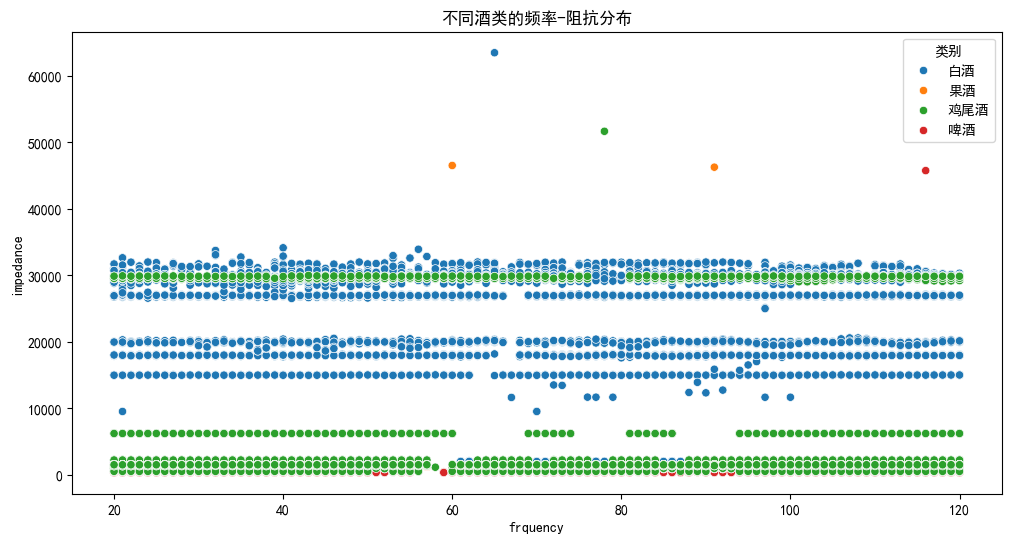

分类报告：
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      1488
           1       0.91      0.90      0.91      1305
           2       0.97      0.98      0.98      1476
           3       0.89      0.90      0.89      1546

    accuracy                           0.93      5815
   macro avg       0.93      0.93      0.93      5815
weighted avg       0.93      0.93      0.93      5815


特征重要性：
   特征       重要性
0  频率  0.037282
1  阻抗  0.962718


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 读取数据
df = pd.read_csv('cleaned_wine_data.csv')

# 数据可视化
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='frquency', y='impedance', hue='类别')
plt.title('不同酒类的频率-阻抗分布')
plt.show()

# 准备特征和目标变量
X = df[['frquency', 'impedance']]
y = df['类别编码']

# 数据标准化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 训练随机森林分类器
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# 模型评估
y_pred = clf.predict(X_test)
print("分类报告：")
print(classification_report(y_test, y_pred))

# 特征重要性
feature_importance = pd.DataFrame({
    '特征': ['频率', '阻抗'],
    '重要性': clf.feature_importances_
})
print("\n特征重要性：")
print(feature_importance)

In [ ]:
X_test

In [ ]:
y_test

In [ ]:
# 将测试数据和预测结果组合成DataFrame
test_results = pd.DataFrame({
    '频率': X_test[:, 0],
    '阻抗': X_test[:, 1],
    '实际类别': y_test,
    '预测类别': y_pred
})

print("\n测试结果：")
test_results

In [ ]:
test_results